#📌 Extracão

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL raw do arquivo JSON no repositório
url = 'https://raw.githubusercontent.com/anthonyhelano/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

# Carregar o DataFrame
df = pd.read_json(url)

# Exibir as primeiras linhas do DataFrame
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [ ]:
# Normalizar as colunas aninhadas: 'customer', 'phone', 'internet', 'account'
df_cliente = pd.json_normalize(df['customer'])
df_telefone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_conta = pd.json_normalize(df['account'])

# Concatenar os dataframes normalizados com as colunas originais 'customerID' e 'Churn'
df = pd.concat([df[['customerID', 'Churn']], df_cliente, df_telefone, df_internet, df_conta], axis=1)

# Exibir as primeiras linhas do DataFrame normalizado
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# Informar o shape do dataset
df.shape

(7267, 21)

In [ ]:
# Informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
# Verificar valores nulo
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
# Verificar registros duplicados baseado em customerID
df.duplicated(subset=['customerID']).sum()

np.int64(0)

In [ ]:
# Verificar valores únicos em cada coluna
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Cr

In [ ]:
# Transformar string Yes e No em dados booleanos
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Partner'] = df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Dependents'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
df['PhoneService'] = df['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)
df['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# Substitir os caracteres de espaço por NaN
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)

# Transformar os valores em string para numéricos
df['Charges.Total'] = df['Charges.Total'].astype(np.float64)

In [ ]:
# Criar a coluna Contas_Diarias dividindo o faturamento mensal por 30 dias
df['Contas_Diarias'] = df['Charges.Monthly'] / 30

# Arredondar para 2 casas decimais para melhor visualização
df['Contas_Diarias'] = df['Contas_Diarias'].round(2)

In [ ]:
# Criar dicionário com as traduções
traducao_colunas = {
    'customerID': 'id_cliente',
    'Churn': 'cancelamento',
    'gender': 'genero',
    'SeniorCitizen': 'idoso',
    'Partner': 'parceiro',
    'Dependents': 'dependentes',
    'tenure': 'tempo_contrato',
    'PhoneService': 'servico_telefone',
    'MultipleLines': 'multiplas_linhas',
    'InternetService': 'servico_internet',
    'OnlineSecurity': 'seguranca_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'protecao_dispositivo',
    'TechSupport': 'suporte_tecnico',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_filmes',
    'Contract': 'contrato',
    'PaperlessBilling': 'fatura_digital',
    'PaymentMethod': 'metodo_pagamento',
    'Charges.Monthly': 'cobranca_mensal',
    'Charges.Total': 'cobranca_total',
    'Contas_Diarias': 'contas_diarias'
}

# Aplicar a tradução
df = df.rename(columns=traducao_colunas)

# Dicionário com traduções para cada valor
traducoes_valores = {
    'genero': {
        'Female': 'Feminino',
        'Male': 'Masculino'
    },
    'multiplas_linhas': {
        'No': 'Não',
        'Yes': 'Sim',
        'No phone service': 'Sem serviço telefônico'
    },
    'servico_internet': {
        'DSL': 'DSL',
        'Fiber optic': 'Fibra óptica',
        'No': 'Não'
    },
    'seguranca_online': {
        'No': 'Não',
        'Yes': 'Sim',
        'No internet service': 'Sem serviço de internet'
    },
    'backup_online': {
        'Yes': 'Sim',
        'No': 'Não',
        'No internet service': 'Sem serviço de internet'
    },
    'protecao_dispositivo': {
        'No': 'Não',
        'Yes': 'Sim',
        'No internet service': 'Sem serviço de internet'
    },
    'suporte_tecnico': {
        'Yes': 'Sim',
        'No': 'Não',
        'No internet service': 'Sem serviço de internet'
    },
    'streaming_tv': {
        'Yes': 'Sim',
        'No': 'Não',
        'No internet service': 'Sem serviço de internet'
    },
    'streaming_filmes': {
        'No': 'Não',
        'Yes': 'Sim',
        'No internet service': 'Sem serviço de internet'
    },
    'contrato': {
        'One year': 'Um ano',
        'Month-to-month': 'Mensal',
        'Two year': 'Dois anos'
    },
    'metodo_pagamento': {
        'Mailed check': 'Cheque pelos correios',
        'Electronic check': 'Cheque eletrônico',
        'Credit card (automatic)': 'Cartão de crédito (automático)',
        'Bank transfer (automatic)': 'Transferência bancária (automática)'
    }
}

# Aplicar as traduções dos valores
for coluna, traducao in traducoes_valores.items():
    if coluna in df.columns:
        df[coluna] = df[coluna].replace(traducao)

# Exibir as primeiras linhas do DataFrame traduzido
df.head()

,id_cliente,cancelamento,genero,idoso,parceiro,dependentes,tempo_contrato,servico_telefone,multiplas_linhas,servico_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,metodo_pagamento,cobranca_mensal,cobranca_total,contas_diarias
0,0002-ORFBO,0,Feminino,0,1,1,9,1,Não,DSL,...,Não,Sim,Sim,Não,Um ano,1,Cheque pelos correios,65.6,593.30,2.19
1,0003-MKNFE,0,Masculino,0,0,0,9,1,Sim,DSL,...,Não,Não,Não,Sim,Mensal,0,Cheque pelos correios,59.9,542.40,2.00
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,Não,Fibra óptica,...,Sim,Não,Não,Não,Mensal,1,Cheque eletrônico,73.9,280.85,2.46
3,0011-IGKFF,1,Masculino,1,1,0,13,1,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mensal,1,Cheque eletrônico,98.0,1237.85,3.27
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,Não,Fibra óptica,...,Não,Sim,Sim,Não,Mensal,1,Cheque pelos correios,83.9,267.40,2.80


In [ ]:
# Verificar valores únicos em cada coluna
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

id_cliente: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
cancelamento: [0 1]
genero: ['Feminino' 'Masculino']
idoso: [0 1]
parceiro: [1 0]
dependentes: [1 0]
tempo_contrato: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
servico_telefone: [1 0]
multiplas_linhas: ['Não' 'Sim' 'Sem serviço telefônico']
servico_internet: ['DSL' 'Fibra óptica' 'Não']
seguranca_online: ['Não' 'Sim' 'Sem serviço de internet']
backup_online: ['Sim' 'Não' 'Sem serviço de internet']
protecao_dispositivo: ['Não' 'Sim' 'Sem serviço de internet']
suporte_tecnico: ['Sim' 'Não' 'Sem serviço de internet']
streaming_tv: ['Sim' 'Não' 'Sem serviço de internet']
streaming_filmes: ['Não' 'Sim' 'Sem serviço de internet']
contrato: ['Um ano' 'Mensal' 'Dois anos']
fatura_digital: [1 0]
metodo_pagamento: ['Cheque

#📊 Carga e análise

In [ ]:
# Configurar estilo e tamanho
plt.style.use('default')
sns.set_palette("husl")

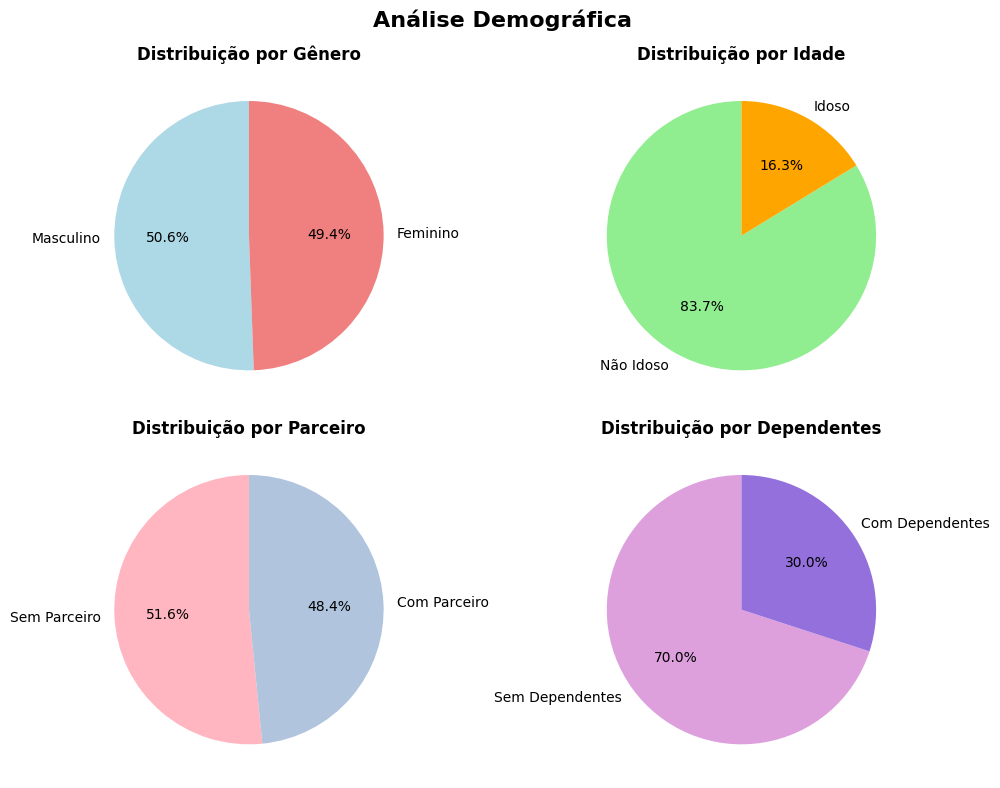

In [ ]:
# Análise Demográfica
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.suptitle('Análise Demográfica', fontsize=16, fontweight='bold')

# Gênero
genero_counts = df['genero'].value_counts()
axes[0,0].pie(genero_counts.values, labels=genero_counts.index, autopct='%1.1f%%',
             startangle=90, colors=['lightblue', 'lightcoral'])
axes[0,0].set_title('Distribuição por Gênero', fontweight='bold')

# Idosos
idoso_counts = df['idoso'].value_counts()
idoso_labels = ['Não Idoso' if x == 0 else 'Idoso' for x in idoso_counts.index]
axes[0,1].pie(idoso_counts.values, labels=idoso_labels, autopct='%1.1f%%',
             startangle=90, colors=['lightgreen', 'orange'])
axes[0,1].set_title('Distribuição por Idade', fontweight='bold')

# Parceiros
parceiro_counts = df['parceiro'].value_counts()
parceiro_labels = ['Sem Parceiro' if x == 0 else 'Com Parceiro' for x in parceiro_counts.index]
axes[1,0].pie(parceiro_counts.values, labels=parceiro_labels, autopct='%1.1f%%',
             startangle=90, colors=['lightpink', 'lightsteelblue'])
axes[1,0].set_title('Distribuição por Parceiro', fontweight='bold')

# Dependentes
dependentes_counts = df['dependentes'].value_counts()
dependentes_labels = ['Sem Dependentes' if x == 0 else 'Com Dependentes' for x in dependentes_counts.index]
axes[1,1].pie(dependentes_counts.values, labels=dependentes_labels, autopct='%1.1f%%',
             startangle=90, colors=['plum', 'mediumpurple'])
axes[1,1].set_title('Distribuição por Dependentes', fontweight='bold')

# Ajustar layout e mostrar gráfico
plt.tight_layout()
plt.show()

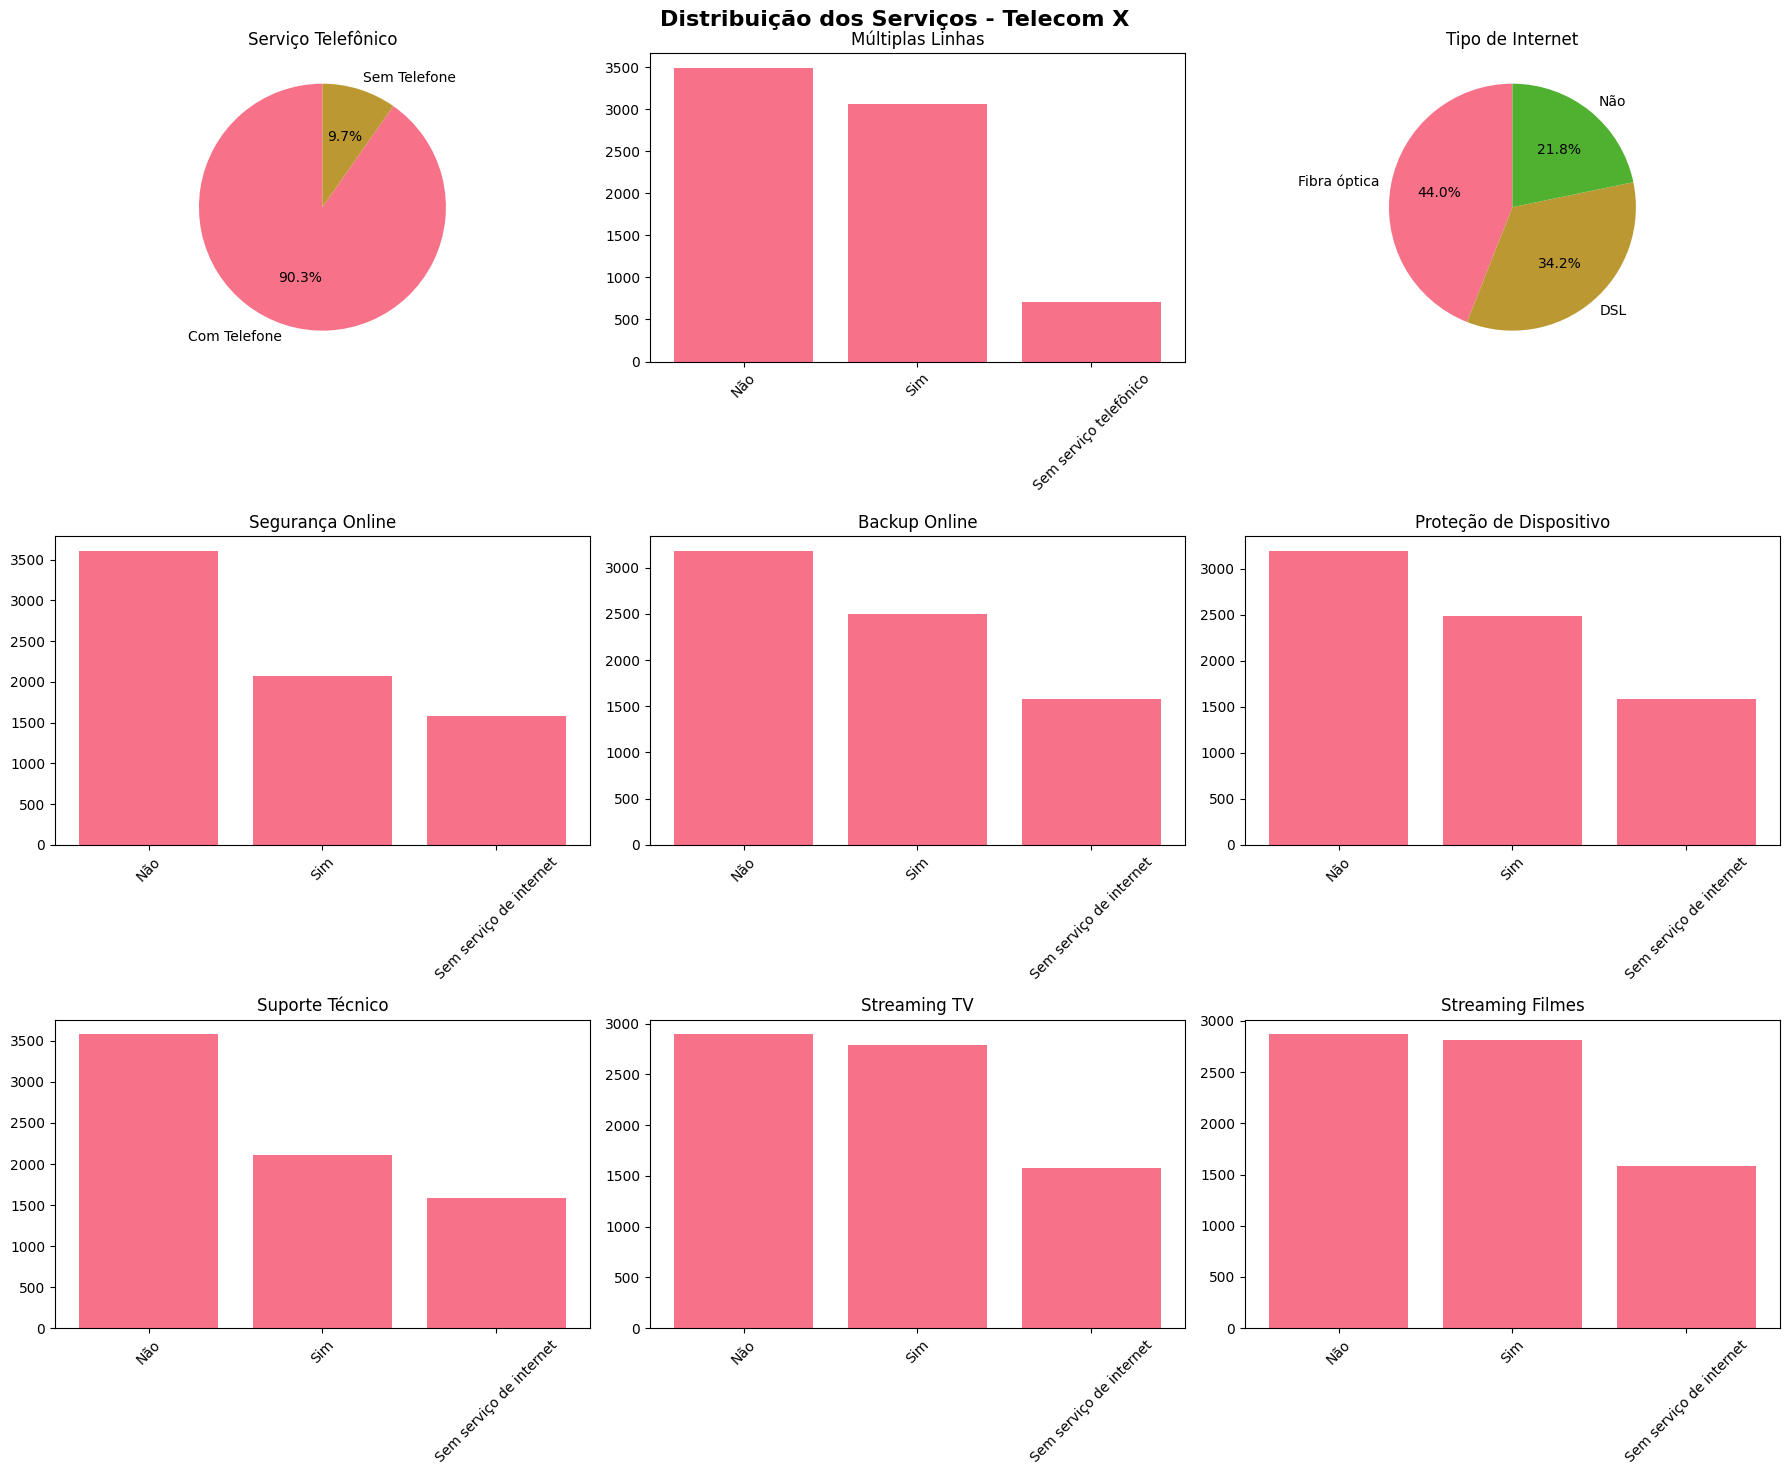

In [ ]:
# Criar figura com subplots sobre a distribuição de serviços
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Distribuição dos Serviços - Telecom X', fontsize=16, fontweight='bold')

# Serviço Telefônico
axes[0,0].pie(df['servico_telefone'].value_counts(),
              labels=['Com Telefone', 'Sem Telefone'],
              autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Serviço Telefônico')

# Múltiplas Linhas
axes[0,1].bar(df['multiplas_linhas'].value_counts().index,
              df['multiplas_linhas'].value_counts().values)
axes[0,1].set_title('Múltiplas Linhas')
axes[0,1].tick_params(axis='x', rotation=45)

# Serviço Internet
axes[0,2].pie(df['servico_internet'].value_counts(),
              labels=df['servico_internet'].value_counts().index,
              autopct='%1.1f%%', startangle=90)
axes[0,2].set_title('Tipo de Internet')

# Segurança Online
axes[1,0].bar(df['seguranca_online'].value_counts().index,
              df['seguranca_online'].value_counts().values)
axes[1,0].set_title('Segurança Online')
axes[1,0].tick_params(axis='x', rotation=45)

# Backup Online
axes[1,1].bar(df['backup_online'].value_counts().index,
              df['backup_online'].value_counts().values)
axes[1,1].set_title('Backup Online')
axes[1,1].tick_params(axis='x', rotation=45)

# Proteção de Dispositivo
axes[1,2].bar(df['protecao_dispositivo'].value_counts().index,
              df['protecao_dispositivo'].value_counts().values)
axes[1,2].set_title('Proteção de Dispositivo')
axes[1,2].tick_params(axis='x', rotation=45)

# Suporte Técnico
axes[2,0].bar(df['suporte_tecnico'].value_counts().index,
              df['suporte_tecnico'].value_counts().values)
axes[2,0].set_title('Suporte Técnico')
axes[2,0].tick_params(axis='x', rotation=45)

# Streaming TV
axes[2,1].bar(df['streaming_tv'].value_counts().index,
              df['streaming_tv'].value_counts().values)
axes[2,1].set_title('Streaming TV')
axes[2,1].tick_params(axis='x', rotation=45)

# Streaming Filmes
axes[2,2].bar(df['streaming_filmes'].value_counts().index,
              df['streaming_filmes'].value_counts().values)
axes[2,2].set_title('Streaming Filmes')
axes[2,2].tick_params(axis='x', rotation=45)

# Ajustar layout e monstar gráfico
plt.tight_layout()
plt.show()

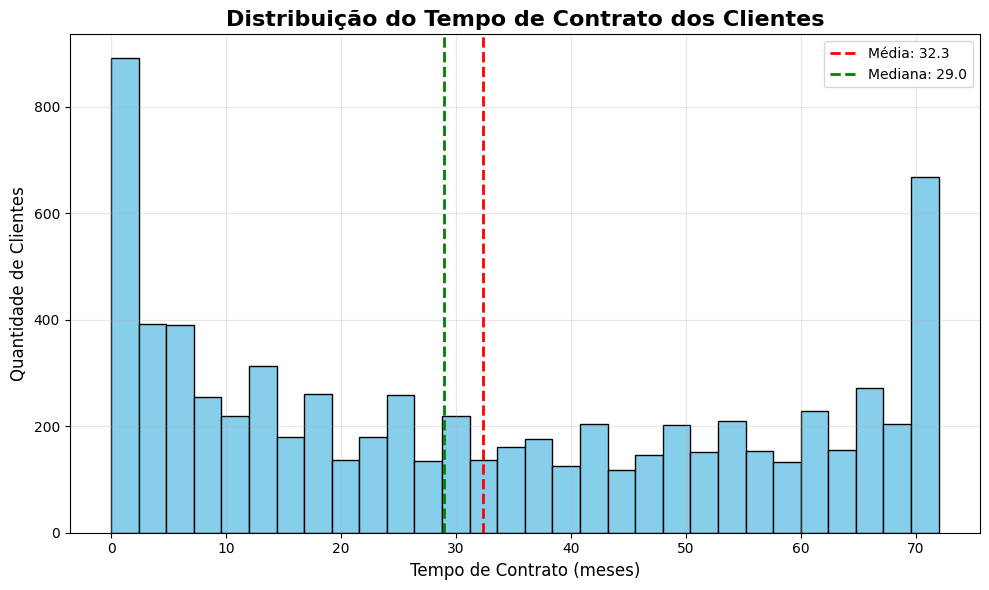

In [ ]:
# Criar histograma da distribuição do tempo de contrato dos clientes
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['tempo_contrato'], bins=30, color='skyblue', edgecolor='black')

ax.set_title('Distribuição do Tempo de Contrato dos Clientes', fontsize=16, fontweight='bold')
ax.set_xlabel('Tempo de Contrato (meses)', fontsize=12)
ax.set_ylabel('Quantidade de Clientes', fontsize=12)

media = df['tempo_contrato'].mean()
mediana = df['tempo_contrato'].median()
ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média: {media:.1f}')
ax.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.1f}')

# Ajustar layout e mostra o gráfico
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

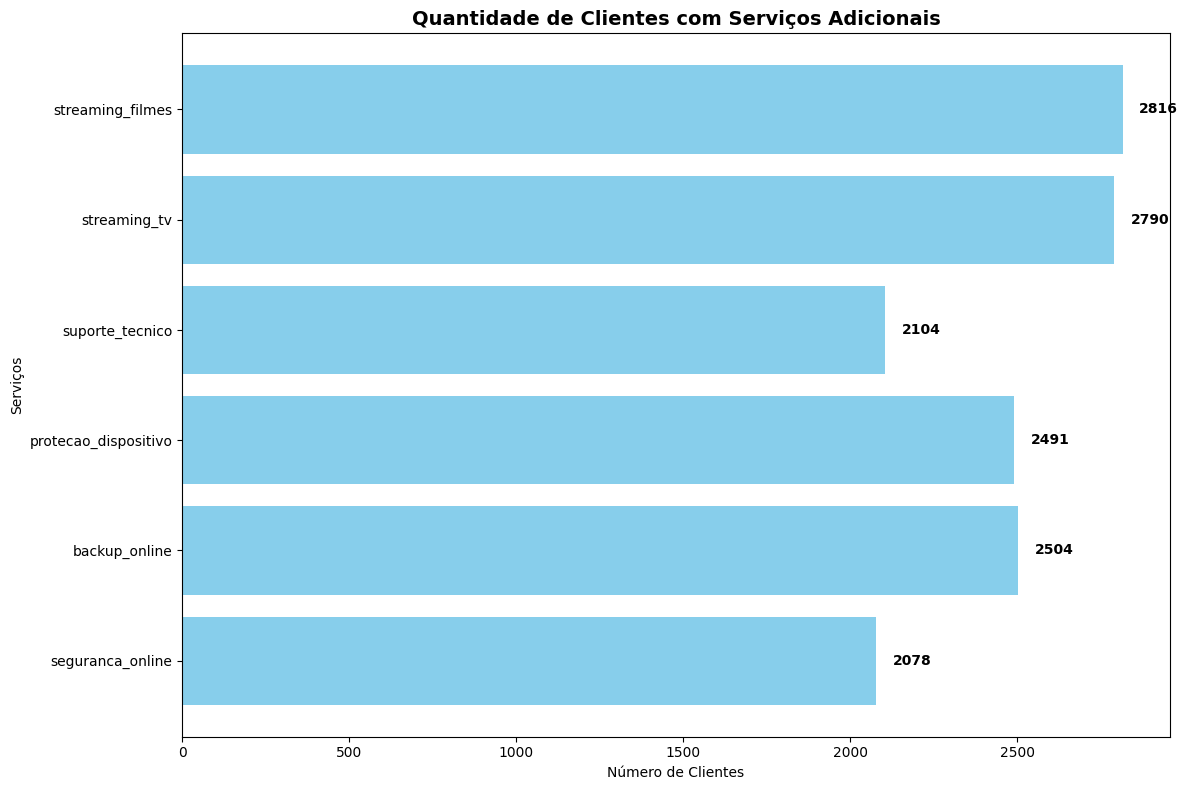

In [ ]:
# Gráfico adicional: Resumo dos serviços adicionais
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

servicos_adicionais = ['seguranca_online', 'backup_online', 'protecao_dispositivo',
                      'suporte_tecnico', 'streaming_tv', 'streaming_filmes']

contagem_sim = []
for servico in servicos_adicionais:
    contagem_sim.append(df[df[servico] == 'Sim'].shape[0])

ax.barh(servicos_adicionais, contagem_sim, color='skyblue')
ax.set_title('Quantidade de Clientes com Serviços Adicionais', fontsize=14, fontweight='bold')
ax.set_xlabel('Número de Clientes')
ax.set_ylabel('Serviços')

# Adicionar valores nas barras
for i, v in enumerate(contagem_sim):
    ax.text(v + 50, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

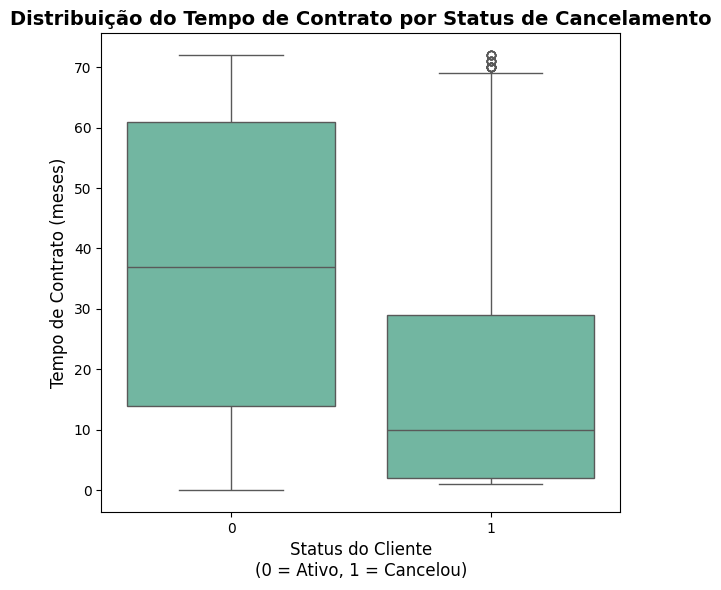

In [ ]:
# Configurar estilo dos gráficos
sns.set_palette("Set2")

# Criar figura
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Boxplot: Comparação de cancelamento
sns.boxplot(data=df, x='cancelamento', y='tempo_contrato', ax=ax)
ax.set_title('Distribuição do Tempo de Contrato por Status de Cancelamento',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Status do Cliente\n(0 = Ativo, 1 = Cancelou)', fontsize=12)
ax.set_ylabel('Tempo de Contrato (meses)', fontsize=12)

# Ajustar layout e mostra o gráfico
plt.tight_layout()
plt.show()

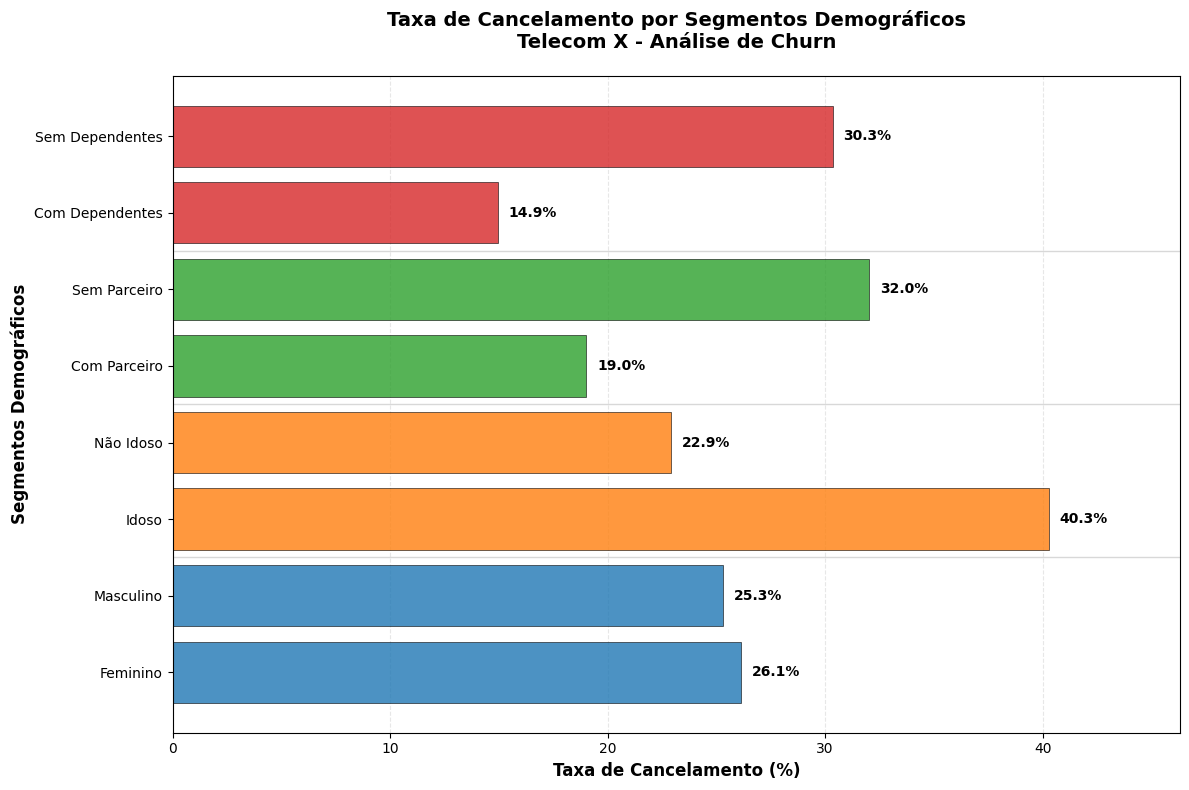

In [ ]:
# Criar figura de barras horizontais sobre a evasão dos clientes
fig, ax = plt.subplots(figsize=(12, 8))

# Calcular taxas de cancelamento por segmento demográfico
demograficos = {}

demograficos['Feminino'] = df[df['genero'] == 'Feminino']['cancelamento'].mean() * 100
demograficos['Masculino'] = df[df['genero'] == 'Masculino']['cancelamento'].mean() * 100
demograficos['Idoso'] = df[df['idoso'] == 1]['cancelamento'].mean() * 100
demograficos['Não Idoso'] = df[df['idoso'] == 0]['cancelamento'].mean() * 100
demograficos['Com Parceiro'] = df[df['parceiro'] == 1]['cancelamento'].mean() * 100
demograficos['Sem Parceiro'] = df[df['parceiro'] == 0]['cancelamento'].mean() * 100
demograficos['Com Dependentes'] = df[df['dependentes'] == 1]['cancelamento'].mean() * 100
demograficos['Sem Dependentes'] = df[df['dependentes'] == 0]['cancelamento'].mean() * 100

# Preparar dados para o gráfico
categorias = list(demograficos.keys())
valores = list(demograficos.values())

# Criar cores diferentes para cada grupo
cores = ['#1f77b4', '#1f77b4',  # Gênero (azul)
         '#ff7f0e', '#ff7f0e',  # Idoso (laranja)
         '#2ca02c', '#2ca02c',  # Parceiro (verde)
         '#d62728', '#d62728']  # Dependentes (vermelho)

# Criar gráfico de barras horizontal
bars = ax.barh(categorias, valores, color=cores, alpha=0.8, edgecolor='black', linewidth=0.5)

# Personalizar o gráfico
ax.set_xlabel('Taxa de Cancelamento (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Segmentos Demográficos', fontsize=12, fontweight='bold')
ax.set_title('Taxa de Cancelamento por Segmentos Demográficos\nTelecom X - Análise de Churn',
             fontsize=14, fontweight='bold', pad=20)

# Adicionar valores nas barras
for i, (bar, valor) in enumerate(zip(bars, valores)):
    ax.text(valor + 0.5, bar.get_y() + bar.get_height()/2,
            f'{valor:.1f}%',
            ha='left', va='center', fontweight='bold', fontsize=10)

# Adicionar linhas de grade
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Definir limites do eixo x
ax.set_xlim(0, max(valores) * 1.15)

# Adicionar separadores visuais entre grupos
ax.axhline(y=1.5, color='gray', linestyle='-', alpha=0.3, linewidth=1)
ax.axhline(y=3.5, color='gray', linestyle='-', alpha=0.3, linewidth=1)
ax.axhline(y=5.5, color='gray', linestyle='-', alpha=0.3, linewidth=1)

# Ajustar layout e mostra o gráfico
plt.tight_layout()
plt.show()


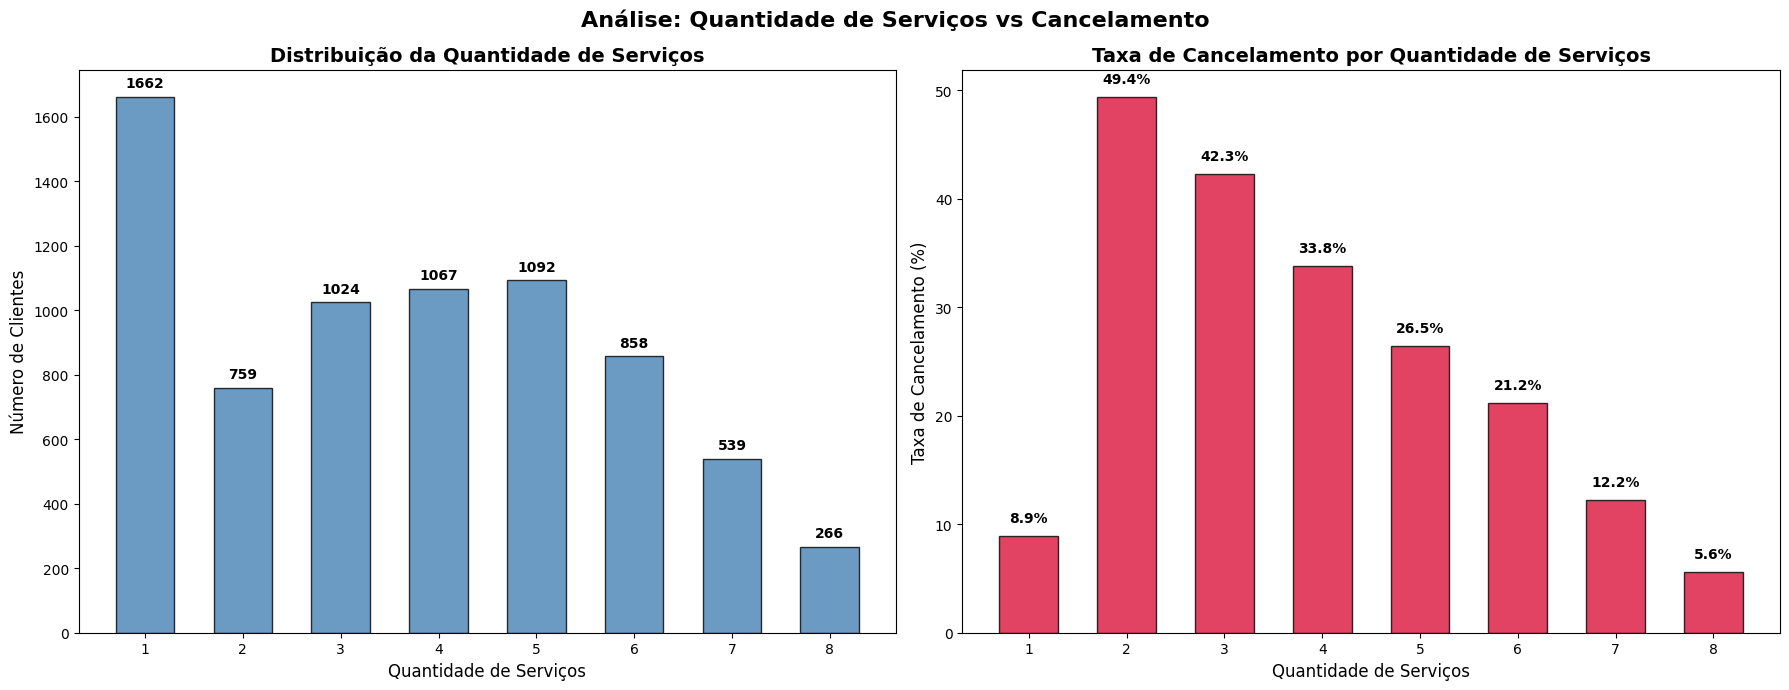

In [ ]:
# Criar coluna com quantidade total de serviços
df['qtd_servicos'] = (
    df['servico_telefone'] +
    (df['servico_internet'] != 'Não').astype(int) +
    (df['seguranca_online'] == 'Sim').astype(int) +
    (df['backup_online'] == 'Sim').astype(int) +
    (df['protecao_dispositivo'] == 'Sim').astype(int) +
    (df['suporte_tecnico'] == 'Sim').astype(int) +
    (df['streaming_tv'] == 'Sim').astype(int) +
    (df['streaming_filmes'] == 'Sim').astype(int)
)

# Criar figura com 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Análise: Quantidade de Serviços vs Cancelamento', fontsize=16, fontweight='bold')

# Distribuição da quantidade de serviços
bars1 = axes[0].bar(range(df['qtd_servicos'].min(), df['qtd_servicos'].max()+1),
                    [sum(df['qtd_servicos'] == i) for i in range(df['qtd_servicos'].min(), df['qtd_servicos'].max()+1)],
                    alpha=0.8, color='steelblue', edgecolor='black', width=0.6)
axes[0].set_title('Distribuição da Quantidade de Serviços', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Quantidade de Serviços', fontsize=12)
axes[0].set_ylabel('Número de Clientes', fontsize=12)
axes[0].set_xticks(range(df['qtd_servicos'].min(), df['qtd_servicos'].max()+1))

# Adicionar valores nas barras
for i, bar in enumerate(bars1):
    height = bar.get_height()
    if height > 0:
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 20,
                    str(int(height)), ha='center', va='bottom', fontweight='bold', fontsize=10)

# Taxa de cancelamento por quantidade de serviços
taxa_churn = df.groupby('qtd_servicos')['cancelamento'].agg(['mean', 'count']).reset_index()
taxa_churn['taxa_percentual'] = taxa_churn['mean'] * 100

bars2 = axes[1].bar(taxa_churn['qtd_servicos'], taxa_churn['taxa_percentual'],
                    color='crimson', alpha=0.8, edgecolor='black', width=0.6)
axes[1].set_title('Taxa de Cancelamento por Quantidade de Serviços', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Quantidade de Serviços', fontsize=12)
axes[1].set_ylabel('Taxa de Cancelamento (%)', fontsize=12)
axes[1].set_xticks(taxa_churn['qtd_servicos'])

# Adicionar valores nas barras
for i, bar in enumerate(bars2):
    height = bar.get_height()
    count = taxa_churn.iloc[i]['count']
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

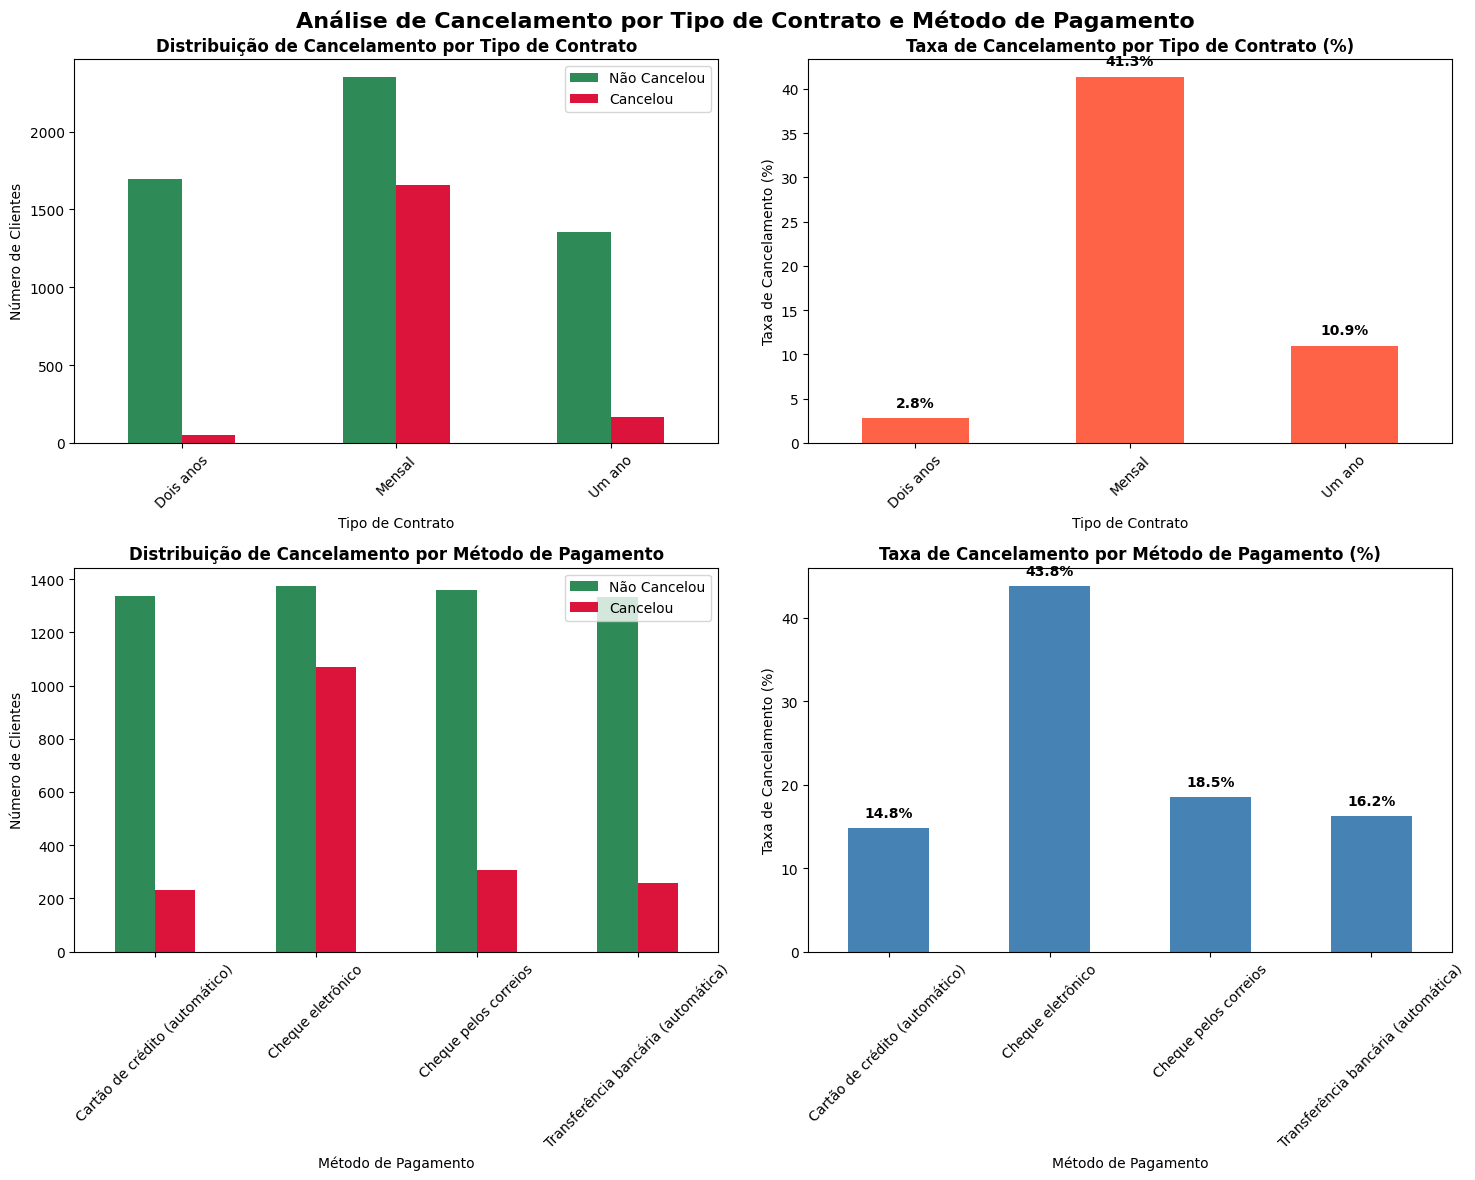

In [ ]:
# Criar figure com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análise de Cancelamento por Tipo de Contrato e Método de Pagamento', fontsize=16, fontweight='bold')

# 1. Distribuição de Cancelamento por Tipo de Contrato (Contagem)
ax1 = axes[0, 0]
churn_contract = df.groupby(['contrato', 'cancelamento']).size().unstack()
churn_contract.plot(kind='bar', ax=ax1, color=['#2E8B57', '#DC143C'])
ax1.set_title('Distribuição de Cancelamento por Tipo de Contrato', fontweight='bold')
ax1.set_xlabel('Tipo de Contrato')
ax1.set_ylabel('Número de Clientes')
ax1.legend(['Não Cancelou', 'Cancelou'], loc='upper right')
ax1.tick_params(axis='x', rotation=45)

# 2. Taxa de Cancelamento por Tipo de Contrato (Percentual)
ax2 = axes[0, 1]
churn_rate_contract = df.groupby('contrato')['cancelamento'].mean() * 100
churn_rate_contract.plot(kind='bar', ax=ax2, color='#FF6347')
ax2.set_title('Taxa de Cancelamento por Tipo de Contrato (%)', fontweight='bold')
ax2.set_xlabel('Tipo de Contrato')
ax2.set_ylabel('Taxa de Cancelamento (%)')
ax2.tick_params(axis='x', rotation=45)

# Adicionar valores nas barras
for i, v in enumerate(churn_rate_contract.values):
    ax2.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# 3. Distribuição de Churn por Método de Pagamento (Contagem)
ax3 = axes[1, 0]
churn_payment = df.groupby(['metodo_pagamento', 'cancelamento']).size().unstack()
churn_payment.plot(kind='bar', ax=ax3, color=['#2E8B57', '#DC143C'])
ax3.set_title('Distribuição de Cancelamento por Método de Pagamento', fontweight='bold')
ax3.set_xlabel('Método de Pagamento')
ax3.set_ylabel('Número de Clientes')
ax3.legend(['Não Cancelou', 'Cancelou'], loc='upper right')
ax3.tick_params(axis='x', rotation=45)

# 4. Taxa de Churn por Método de Pagamento (Percentual)
ax4 = axes[1, 1]
churn_rate_payment = df.groupby('metodo_pagamento')['cancelamento'].mean() * 100
churn_rate_payment.plot(kind='bar', ax=ax4, color='#4682B4')
ax4.set_title('Taxa de Cancelamento por Método de Pagamento (%)', fontweight='bold')
ax4.set_xlabel('Método de Pagamento')
ax4.set_ylabel('Taxa de Cancelamento (%)')
ax4.tick_params(axis='x', rotation=45)

# Adicionar valores nas barras
for i, v in enumerate(churn_rate_payment.values):
    ax4.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

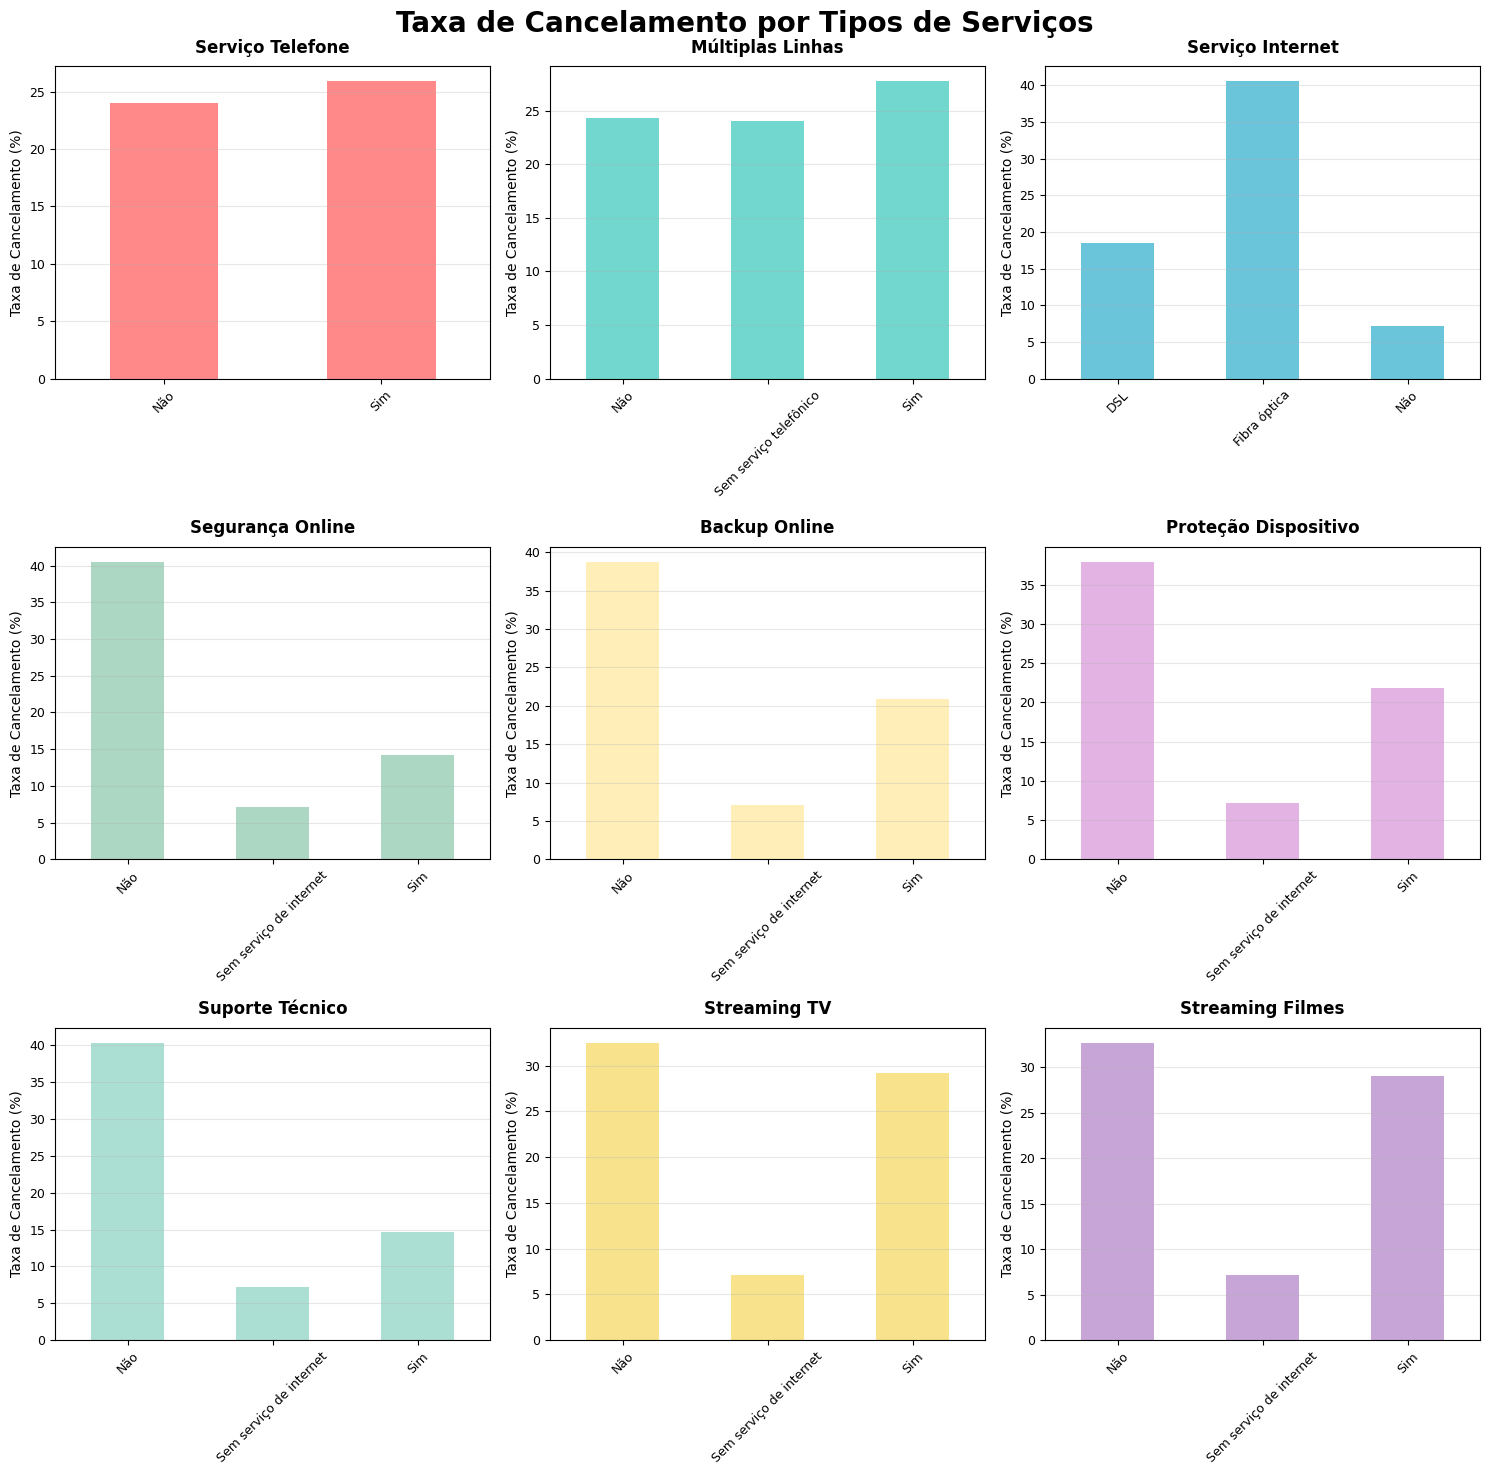

In [ ]:
# Lista de variáveis de serviços para analisar
servicos = [
    'servico_telefone', 'multiplas_linhas', 'servico_internet',
    'seguranca_online', 'backup_online', 'protecao_dispositivo',
    'suporte_tecnico', 'streaming_tv', 'streaming_filmes'
]

# Criar figure com múltiplos subplots (3x3)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Taxa de Cancelamento por Tipos de Serviços', fontsize=20, fontweight='bold', y=0.98)

# Achatar o array de axes para facilitar iteração
axes_flat = axes.flatten()

# Cores para os gráficos
cores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE']

# Criar gráfico para cada serviço
for i, servico in enumerate(servicos):
    ax = axes_flat[i]

    # Calcular taxa de cancelamento por categoria do serviço
    if servico == 'servico_telefone':
        # Para serviço telefone (0/1), converter para labels mais descritivas
        df_temp = df.copy()
        df_temp['servico_telefone_label'] = df_temp['servico_telefone'].map({1: 'Sim', 0: 'Não'})
        churn_rate = df_temp.groupby('servico_telefone_label')['cancelamento'].mean() * 100
        titulo = 'Serviço Telefone'
    else:
        churn_rate = df.groupby(servico)['cancelamento'].mean() * 100
        # Títulos mais amigáveis
        titulos_map = {
            'multiplas_linhas': 'Múltiplas Linhas',
            'servico_internet': 'Serviço Internet',
            'seguranca_online': 'Segurança Online',
            'backup_online': 'Backup Online',
            'protecao_dispositivo': 'Proteção Dispositivo',
            'suporte_tecnico': 'Suporte Técnico',
            'streaming_tv': 'Streaming TV',
            'streaming_filmes': 'Streaming Filmes'
        }
        titulo = titulos_map.get(servico, servico)

    # Criar gráfico de barras
    bars = churn_rate.plot(kind='bar', ax=ax, color=cores[i], alpha=0.8)
    ax.set_title(titulo, fontweight='bold', fontsize=12, pad=10)
    ax.set_ylabel('Taxa de Cancelamento (%)', fontsize=10)
    ax.set_xlabel('')

    # Ajustar labels do eixo x
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3828317164.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_cancelamento = df_temp.groupby('faixa_gasto')['cancelamento'].agg(['count', 'sum']).reset_index()


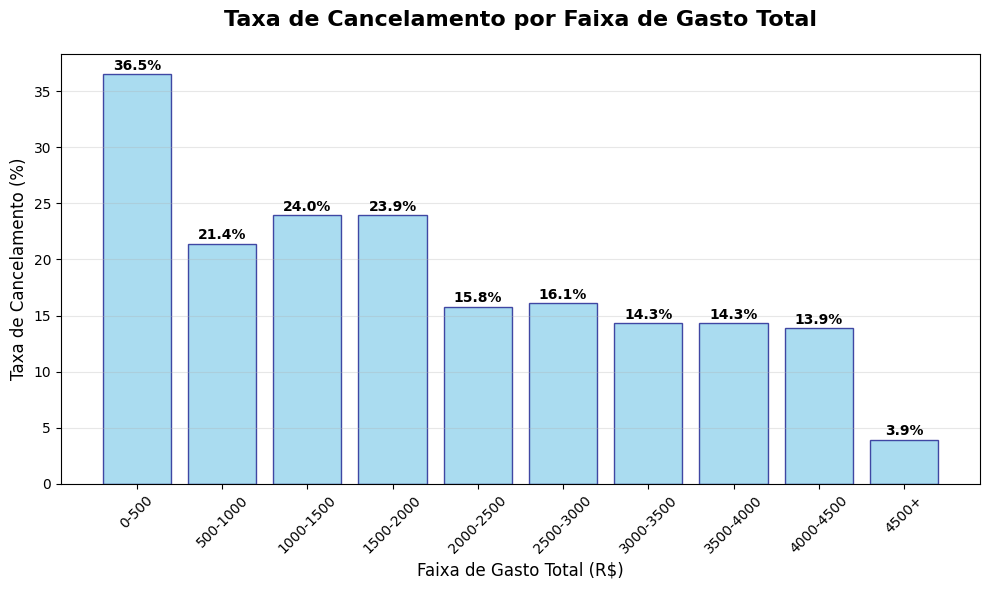

In [ ]:
# Criar faixas de valor para análise da taxa de cancelamento
df_temp = df.copy()
df_temp['faixa_gasto'] = pd.cut(df_temp['cobranca_total'],
                                bins=10,
                                labels=['0-500', '500-1000', '1000-1500', '1500-2000',
                                       '2000-2500', '2500-3000', '3000-3500', '3500-4000',
                                       '4000-4500', '4500+'])

# Calcular taxa de cancelamento por faixa
taxa_cancelamento = df_temp.groupby('faixa_gasto')['cancelamento'].agg(['count', 'sum']).reset_index()
taxa_cancelamento['taxa_churn'] = (taxa_cancelamento['sum'] / taxa_cancelamento['count']) * 100

# Criar o gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(taxa_cancelamento)), taxa_cancelamento['taxa_churn'],
               color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Taxa de Cancelamento por Faixa de Gasto Total', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Faixa de Gasto Total (R$)', fontsize=12)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=12)
plt.xticks(range(len(taxa_cancelamento)), taxa_cancelamento['faixa_gasto'], rotation=45)

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

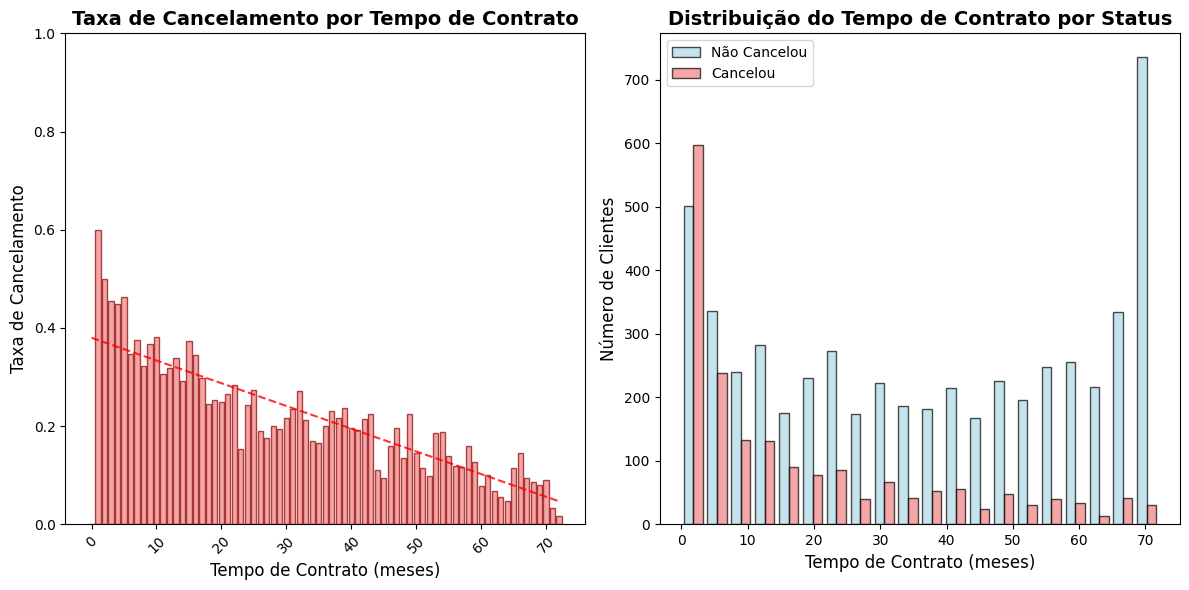

In [ ]:
# Configurar o estilo do gráfico
plt.figure(figsize=(12, 6))

# Calcular a taxa de cancelamento por tempo de contrato
taxa_cancelamento = df.groupby('tempo_contrato')['cancelamento'].agg(['mean', 'count']).reset_index()
taxa_cancelamento.columns = ['tempo_contrato', 'taxa_cancelamento', 'total_clientes']

# Filtrar apenas grupos com pelo menos 10 clientes para ter estatísticas mais confiáveis
taxa_cancelamento = taxa_cancelamento[taxa_cancelamento['total_clientes'] >= 10]

# Criar o gráfico de barras
plt.subplot(1, 2, 1)
bars = plt.bar(taxa_cancelamento['tempo_contrato'],
               taxa_cancelamento['taxa_cancelamento'],
               color='lightcoral',
               alpha=0.7,
               edgecolor='darkred')

plt.title('Taxa de Cancelamento por Tempo de Contrato', fontsize=14, fontweight='bold')
plt.xlabel('Tempo de Contrato (meses)', fontsize=12)
plt.ylabel('Taxa de Cancelamento', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Adicionar linha de tendência
z = np.polyfit(taxa_cancelamento['tempo_contrato'], taxa_cancelamento['taxa_cancelamento'], 1)
p = np.poly1d(z)
plt.plot(taxa_cancelamento['tempo_contrato'], p(taxa_cancelamento['tempo_contrato']), "r--", alpha=0.8)

# Gráfico adicional: Histograma do tempo de contrato por status de cancelamento
plt.subplot(1, 2, 2)
df_nao_cancelou = df[df['cancelamento'] == 0]['tempo_contrato']
df_cancelou = df[df['cancelamento'] == 1]['tempo_contrato']

plt.hist([df_nao_cancelou, df_cancelou],
         bins=20,
         label=['Não Cancelou', 'Cancelou'],
         color=['lightblue', 'lightcoral'],
         alpha=0.7,
         edgecolor='black')

plt.title('Distribuição do Tempo de Contrato por Status', fontsize=14, fontweight='bold')
plt.xlabel('Tempo de Contrato (meses)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()


#📄Relatorio Final

# Introdução
Este relatório faz parte do projeto Challenge Alura One e visa apoiar a tomada de decisão da empresa Telecom X frente ao desafio do "Churn de Clientes". Diante de um alto índice de cancelamentos, a empresa busca compreender os principais fatores que levam à perda de sua base de clientes.

Para isso, foi realizada uma análise exploratória da base de dados de clientes, utilizando a linguagem Python e as bibliotecas pandas, matplotlib e seaborn para criação de gráficos e visualizações que permitissem identificar padrões e comportamentos relevantes.

As etapas do projeto envolveram:
* Importação e manipulação de dados provenientes de uma API, de forma eficiente e estruturada.
* Aplicação dos princípios de ETL (Extração, Transformação e Carga) para preparação dos dados.
* Criação de visualizações estratégicas para destacar padrões e tendências associados ao churn.
* Realização de uma Análise Exploratória de Dados (EDA) e elaboração de um relatório com insights relevantes para embasar ações e estratégias de retenção de clientes.

# Limpeza e Tratamento de Dados
Com os dados importados utilizando a biblioteca pandas, foram aplicadas diversas transformações para garantir a qualidade, consistência e usabilidade das informações na análise. Abaixo, estão detalhadas as principais etapas do processo de limpeza e tratamento dos dados:
* Importação dos dados: Os dados foram carregados com a biblioteca pandas, o que permitiu manipulações eficientes durante todo o processo de análise.
* Normalização de colunas aninhadas: As colunas compostas, 'customer', 'phone', 'internet' e 'account', foram normalizadas em dataframes separados, facilitando o acesso a informações detalhadas contidas em estruturas aninhadas. E, em seguida:
* Concatenação dos dados: Os dataframes resultantes da normalização foram concatenados com as colunas principais 'customerID' e 'Churn', unificando a base de dados para facilitar o tratamento e análise posteriores.
* Tratamento de valores ausentes e inconsistências:
  * Verificação e tratamento de valores nulos.
  * Substituição de caracteres em branco por NaN.
  * Conversão de colunas com valores "Yes"/"No" para o formato booleano (True/False).
  * Conversão de colunas numéricas armazenadas como string para o tipo adequado (float ou int).
* Criação de nova coluna:
  * A coluna Contas_Diarias foi criada a partir da divisão do valor de faturamento mensal por 30, com o objetivo de obter uma média diária de gastos por cliente.
* Padronização e tradução de variáveis, visando tornar os dados mais acessíveis e compreensíveis para os stakeholders da empresa.

# Análise Exploratória de Dados
Com a base de dados tratada, foi realizada uma Análise Exploratória de Dados (EDA) para investigar padrões, relações e possíveis fatores associados ao cancelamento de clientes (churn). Para isso, foram geradas diversas visualizações com o objetivo de fornecer insights acionáveis para o time de negócios. A seguir, os principais pontos analisados:
## 1 Análise Demográfica
Gênero: Foi avaliada a distribuição entre clientes masculinos e femininos.
Idade: Verificada a proporção de clientes considerados idosos.
Relacionamento conjugal: Identificada a presença de um parceiro ou parceira.
Dependentes: Analisada a quantidade de clientes com dependentes.
Essas variáveis permitiram segmentar os perfis de clientes e identificar padrões iniciais associados ao cancelamento.
## 2 Análise dos Serviços Contratados
Verificou-se a distribuição dos principais serviços: telefone, internet e serviços adicionais, como segurança online, backup, proteção de dispositivos, suporte técnico, streaming de TV e filmes.
Foi avaliada a quantidade de serviços adicionais por cliente, relacionando essa informação com o status de cancelamento.
## 3 Tempo de Contrato
A distribuição do tempo de contrato foi analisada para compreender o perfil de permanência dos clientes.
Também foi gerada a distribuição segmentada por status de cancelamento, evidenciando diferenças entre clientes que permanecem e os que cancelam.
## 4 Segmentação por Cancelamento
Foi calculada a taxa de cancelamento por segmento demográfico, como idade, presença de dependentes e parceiro(a).
Analisada a relação entre o número de serviços contratados e a probabilidade de churn.
## 5 Tipo de Contrato e Pagamento
Avaliada a taxa de cancelamento por tipo de contrato (mensal, anual e bienal).
Observada a influência do método de pagamento (cartão, transferência bancária, cheques) no comportamento de cancelamento.
## 6 Gasto e Cancelamento
Estudada a relação entre faixas de cobrança total e a taxa de churn.
## 7 Interações entre Variáveis
Foram cruzados o tempo de contrato com o status de cancelamento, revelando tendências entre clientes de curta e longa duração.
Por fim, visualizou-se a distribuição do tempo de contrato entre clientes que cancelaram e os que permaneceram ativos, reforçando os padrões identificados.
# Conclusões e Insights
## 1 Análise da Distribuição do Tempo de Contrato por Status de Cancelamento
Analisando a distribuição do tempo de contrato por status de cancelamento, pode-se observar que clientes ativos possuem uma distribuição de tempo de contrato bem maior, e a mediana do tempo de contrato é alta, por volta de 36–38 meses. Ainda, há mais variabilidade nos tempos de contrato e muitos clientes ativos estão há mais de 60 meses na empresa.

Para os clientes cancelados, a mediana de tempo de contrato é bem menor, em torno de 10 meses; isto é, a maior parte dos clientes cancelam cedo. Existem outliers com contratos longos, mas são poucos (acima de 60 meses).
## 2 Análise da Taxa de Cancelamento por Segmentos Demográficos
A análise da taxa de cancelamento por segmentos demográficos revelou padrões importantes que podem orientar estratégias de retenção. O grupo com maior taxa de churn é composto por clientes idosos, com 40,3%, o que indica uma necessidade de atenção especial a esse público, possivelmente com foco em acessibilidade, suporte e usabilidade dos serviços.

Clientes sem dependentes (30,3%) e sem parceiro (32,0%) também apresentaram taxas de cancelamento significativamente superiores em relação aos seus respectivos opostos: com dependentes (14,9%) e com parceiro (19,0%). Esses dados sugerem que clientes com vínculos familiares tendem a apresentar maior estabilidade e engajamento com a empresa, ou mais relutantes em trocar de operadora.
No que diz respeito ao gênero, não foram observadas diferenças relevantes: homens apresentaram taxa de churn de 25,3% e mulheres, 26,1%, indicando que o fator gênero não é determinante para o cancelamento.
## 3 Análise da Quantidade de Serviços e Taxa de Cancelamento
A análise demonstrou que a quantidade de serviços contratados está diretamente relacionada à taxa de cancelamento. Clientes com 2 e 3 serviços apresentam as maiores taxas de churn, com 49,4% e 42,3%, respectivamente, configurando-se como grupos com maior risco de evasão. Por outro lado, a taxa de cancelamento diminui progressivamente entre clientes com 4 ou mais serviços, chegando a apenas 5,6% entre aqueles com 8 serviços.

Curiosamente, clientes com apenas um serviço, embora representem o maior grupo da base, apresentam uma taxa de cancelamento relativamente baixa (8,9%), o que pode indicar satisfação com um serviço específico ou menor envolvimento com a marca.
## 4 Análise de Cancelamento por Tipo de Contrato e Método de Pagamento
A análise revelou que o tipo de contrato é um dos fatores mais impactantes na taxa de cancelamento. Clientes com contrato mensal apresentaram uma taxa de churn de 41,3%, muito superior à verificada entre clientes com contrato anual (10,9%) e bienal (2,8%). Esse resultado evidencia que contratos de maior duração contribuem significativamente para a fidelização dos clientes.

Em relação ao método de pagamento, identificou-se que clientes que utilizam cheque eletrônico apresentam maior propensão ao cancelamento (43,6%), enquanto métodos automáticos, como cartão de crédito (14,8%) e transferência bancária (16,2%), apresentam os menores índices. Isso sugere que a automatização e a praticidade no pagamento exercem papel relevante na permanência do cliente.
## 5 Análise da Taxa de Cancelamento por Tipo de Serviço
A análise evidenciou que a ausência de serviços complementares está diretamente associada a taxas mais elevadas de cancelamento. Clientes que não contratam serviços como backup online, segurança online, suporte técnico, proteção de dispositivo, streaming de TV ou filmes apresentam taxas de churn superiores a 35%, enquanto aqueles que utilizam esses serviços tendem a permanecer mais tempo na base.

Com relação ao serviço de internet, observou-se que clientes sem esse serviço apresentam taxas de cancelamento muito baixas (7%), possivelmente por pertencerem a um segmento de menor envolvimento com a operadora. Por outro lado, clientes com internet via fibra óptica apresentam as maiores taxas de churn (41%), o que pode estar relacionado ao perfil mais exigente desses usuários ou a eventuais problemas específicos de serviço.

A taxa de cancelamento entre clientes com e sem telefone ou múltiplas linhas mostrou-se estável, indicando que esses serviços, isoladamente, não influenciam fortemente a decisão de permanência.
## 6 Análise da Taxa de Cancelamento por Faixa de Gasto Total
A análise da taxa de cancelamento por faixa de gasto total revelou um padrão claro: quanto menor o gasto acumulado pelo cliente, maior a propensão ao cancelamento dos serviços. A faixa de menor gasto (R$ 0–500) apresentou uma taxa de churn significativamente elevada (36,5%), contrastando fortemente com os clientes da faixa mais alta (acima de R$ 4500), cuja taxa foi de apenas 3,9%.

Este comportamento sugere que clientes de baixo valor percebido podem ter menor engajamento com os serviços da Telecom X ou encontrar menor atratividade nos planos ofertados. Já clientes que gastam mais tendem a demonstrar maior fidelização, possivelmente por estarem satisfeitos com o serviço, utilizarem mais produtos ou integrarem-se a pacotes mais completos.
## 7 Análise da Taxa de Cancelamento por Tempo de Contrato
A análise dos gráficos revela que o tempo de contrato é um dos fatores mais relevantes na previsão de churn. Clientes que estão há pouco tempo com a empresa têm uma probabilidade significativamente maior de cancelar seus serviços. A taxa de cancelamento atinge os maiores valores nos primeiros meses de contrato, ultrapassando 60% no início, e apresenta uma redução contínua à medida que o tempo de permanência aumenta, aproximando-se de 0% para contratos acima de 60 meses.

# Recomendações
Com base na análise exploratória realizada e nos principais insights obtidos, foram identificadas oportunidades relevantes de intervenção para mitigar a taxa de cancelamento de clientes da Telecom X. A seguir, são apresentadas recomendações fundamentadas nos dados analisados, com foco em aumentar a retenção e a satisfação dos clientes:

**Fortalecer o Engajamento nos Primeiros Meses de Contrato**
Dado que a maior parte dos cancelamentos ocorre nos primeiros 10 meses de vínculo, recomenda-se a implementação de um programa estruturado de onboarding e engajamento. Ações como comunicações personalizadas, acompanhamento proativo do uso dos serviços e oferta de benefícios progressivos podem contribuir significativamente para a fidelização precoce.

**Desenvolver Ações Focadas no Público Idoso**
Considerando a elevada taxa de churn entre clientes idosos (40,3%), sugere-se a criação de iniciativas específicas para esse público. Essas ações podem incluir canais de atendimento mais acessíveis, materiais educativos com linguagem simplificada e planos customizados, que priorizem usabilidade e suporte técnico eficiente.

**Ofertar Combos de Serviços para Clientes com Pouca Adoção**
Clientes que contratam apenas dois ou três serviços apresentam maiores taxas de cancelamento. A recomendação é estimular o cross-selling por meio de pacotes de serviços com vantagens financeiras, benefícios agregados e períodos promocionais, promovendo maior envolvimento e fidelidade à marca.

**Incentivar a Migração para Contratos de Longo Prazo**
Os dados indicam que contratos mensais estão fortemente associados a uma maior propensão ao churn. Portanto, propõe-se o incentivo à adesão de contratos anuais ou bienais, mediante descontos, bonificações ou condições especiais, com o objetivo de aumentar a previsibilidade e retenção da base de clientes.

**Promover Métodos de Pagamento Automatizados**
Identificou-se uma correlação significativa entre métodos de pagamento não automatizados, como cheque eletrônico, e altas taxas de cancelamento. Assim, recomenda-se incentivar o uso de débito automático e cartão de crédito por meio de campanhas informativas e benefícios financeiros, visando maior comodidade e engajamento.

**Estimular a Adoção de Serviços Complementares**
Clientes que não utilizam serviços adicionais demonstram propensão elevada ao churn. Recomenda-se a realização de campanhas promocionais que destaquem o valor dos serviços complementares, com possibilidade de testes gratuitos, pacotes promocionais e comunicações personalizadas de acordo com o perfil de uso.

**Atuar sobre Clientes com Baixo Gasto Total**
A análise revelou que clientes com menor gasto acumulado apresentam maior tendência ao cancelamento. Recomenda-se o desenvolvimento de estratégias voltadas a esse segmento, como revisão de planos ofertados, programas de fidelidade e ações de retenção específicas para aumentar o valor percebido.

**Implementar um Modelo Preditivo de Churn**
Considerando os diversos padrões identificados, é recomendável o desenvolvimento e adoção de um modelo de machine learning capaz de prever a probabilidade de cancelamento de cada cliente. Isso possibilitará ações preventivas direcionadas, otimizando os esforços do time de retenção e contribuindo para a redução da evasão.

